In [233]:
import numpy as np
import csv
import os
import matplotlib.pyplot as plt
import pandas as pd
import math
import scipy
import scipy.signal


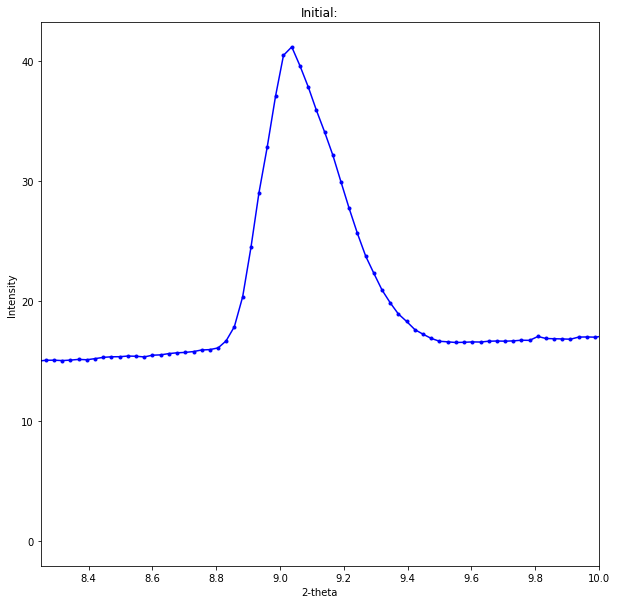

Processed 1751 lines.


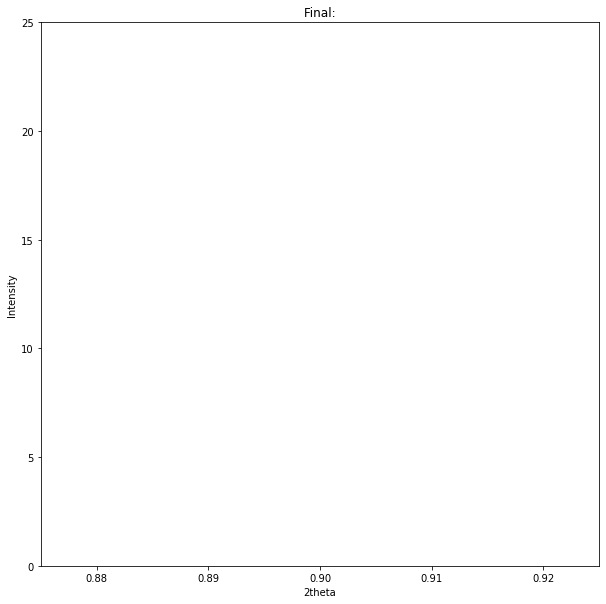

In [234]:
'''Open the csv file and plot the first and last frames of the data (columns 1 and 30). The columnnumbers will need to be adjusted
if the data file of interest is not 30 frames.'''
with open('B1_MAPbI2Br_Dark60min.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    x=[]
    y=[]
    z=[]
    for row in csv_reader:
        if line_count == 0:

            line_count += 1
        else:
            x.append(float(row[0]))
            y.append(float(row[1]))
            z.append(float(row[23]))
            line_count += 1

##plot initial data
plt.plot(x,y, marker='.', color='blue')
plt.xlim((8.25, 10))
plt.title('Initial:')
plt.xlabel('2-theta')
plt.ylabel('Intensity')
plt.show()
plt.rcParams["figure.figsize"] = (10,10)
print(f'Processed {line_count} lines.')



##subtract background
import math
#result=[[y-(((10/7)*x)-(17/7))] for row in y]
result = np.subtract (y,107/7)
#above is line that isnt working
#ideally want to subtract (10/7)x + (17/7) from y
#arrayx = numpy.array([x])
#arrayy = numpy.array([y])
#arrayz = numpy.array([z])
#result = [arrayy - (((10/7)*arrayx)+(17/7)) for x in y]
plt.plot(x,result, marker='.',color='teal')
plt.xlim (0.875,0.925)
plt.ylim (0,25)
plt.title('Final:')
plt.xlabel('2theta')
plt.ylabel('Intensity')
plt.show()
plt.rcParams["figure.figsize"] = (10,10)
#background subtraction that displays correctly is at bottom




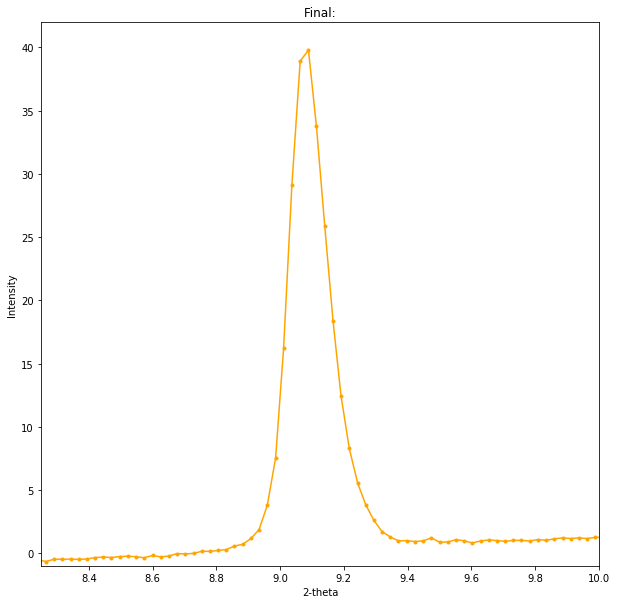

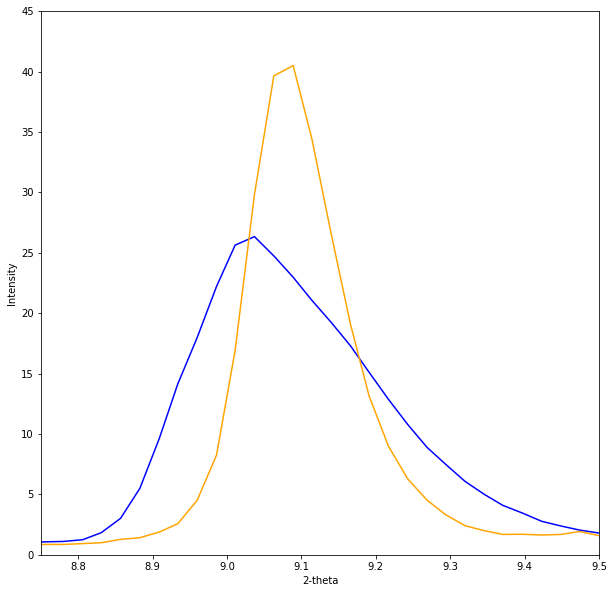

In [235]:
##plot final w background subtracted
result = np.subtract (z,107/7)
#ideally want to subtract (10/7)x + (17/7) from y
plt.plot(x,result, marker='.',color='orange')
#from scipy.signal import medfilt
#print(medfilt([x,z], 25))
plt.title('Final:')
plt.xlabel('2-theta')
plt.ylabel('Intensity')
plt.xlim((8.25, 10))
plt.ylim ((-1,42))
plt.rcParams["figure.figsize"] = (10,10)
plt.show()


##plot initial vs final
result1 = np.subtract (y,104/7)
result2 = np.subtract (z,102/7)
#ideally want to subtract (10/7)x + (17/7) from y
plt.plot(x,result1, color='blue')
plt.plot(x,result2,color='orange')
plt.xlabel('2-theta')
plt.ylabel('Intensity')
plt.xlim (8.75,9.5)
plt.ylim (0,45)
plt.rcParams["figure.figsize"] = (10,10)
plt.show()

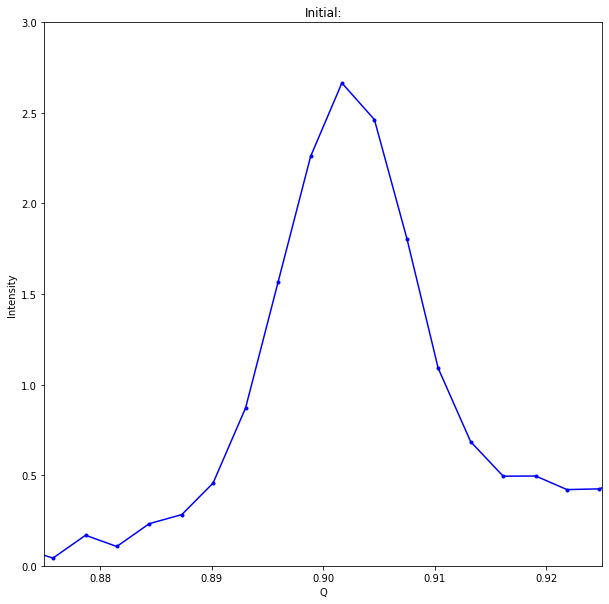

In [236]:
'''Converting the 2-theta data into a lattice spacing in Angstroms and converting angstoms to Q'''

import math
result1=[(((((9.763E-11)/(2*math.sin(math.radians(row/2)))*1e10)**-1)*2)*math.pi) for row in x]
result2 = np.subtract (y,102/7)
#ideally want to subtract (10/7)x + (17/7) from y
plt.plot(result1,result2, marker='.',color='blue')
plt.xlim((0.875, .925))
plt.ylim((0,3))
plt.title('Initial:')
plt.xlabel('Q')
plt.ylabel('Intensity')
plt.rcParams["figure.figsize"] = (10,10)
plt.show()


In [237]:
'''Calculating the maximum intensity and figuring out where that maximum value is in terms of '''
maxValue=np.max(y)
# print(maxValue)
index=y.index(maxValue)
lspace=(((result[index]/2)/math.pi)**-1)
lspace2=(x[index])
print('lattice spacing=', lspace, 'Angstroms')
print(lspace2)



lattice spacing= 0.21576660918876928 Angstroms
9.037


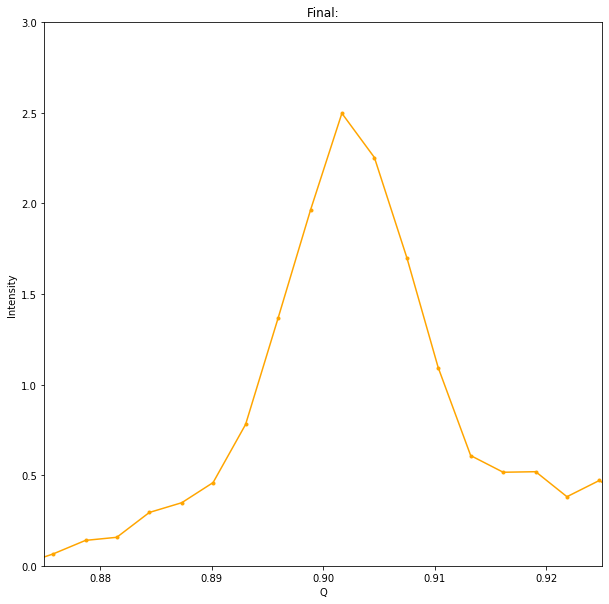

In [238]:
'''Converting the 2-theta data into a lattice spacing in Angstroms and converting angstoms to Q'''

import math

result1=[(((((9.763E-11)/(2*math.sin(math.radians(row/2)))*1e10)**-1)*2)*math.pi) for row in x]
result2 = np.subtract (z,100/7)
#ideally want to subtract (10/7)x + (17/7) from y
plt.plot(result1,result2, marker='.',color='orange')
plt.xlim (0.875,0.925)
plt.ylim (0,3)
plt.title('Final:')
plt.xlabel('Q')
plt.ylabel('Intensity')
plt.rcParams["figure.figsize"] = (10,10)
plt.show()

        

RuntimeError: matplotlib does not support generators as input

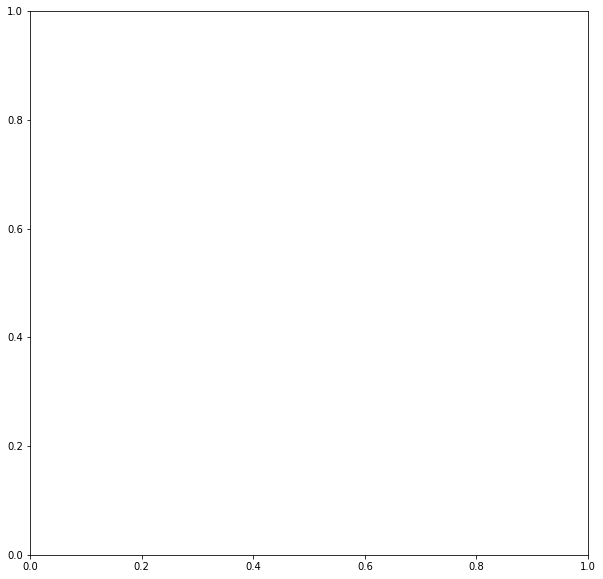

In [239]:
# IN PROGRESS
#import scipy; print(scipy.__version__)
# from scipy.signal import find_peaks
# peaks, _= find_peaks(y,threshold=0.6)
# plt.plot(result, y, lw=0.4, alpha=0.4 )
# # print(peaks[3])

# newY=[]
# newX=[]
# for i in peaks:
#     newX.append(result[i])
#     newY.append(y[i])
# print('Lattice Spacing=', newX, 'in Angstroms')
# print('Intensity=', newY)

# plt.plot(newX,newY, marker="o", ls="", ms=3 )

# plt.show()

'''2 theta calculations for peaks'''
'''------------------------------'''

# import scipy; print(scipy.__version__)
from scipy.signal import find_peaks
peaks, _= find_peaks(y, threshold=0.6)
"result=[]"
result=((((result([index])/2)/math.pi)**-1) for row in x)
plt.plot(result, y, lw=0.4, alpha=0.4)
# print(peaks[3])

newY=[]
newX=[]
for i in peaks:
    newX.append(result[i])
    newY.append(y[i])
print('Lattice Spacing=', newX, 'in Angstroms')
print('Intensity=', newY)

plt.plot(newX,newY, marker="o", ls="", ms=3 )

plt.show()

In [ ]:
##Miller Ind and Peak Picking
def nums(howMany):
    indices=[]
    millInd=[]
    for l in range(howMany):
        for k in range(howMany):
            for h in range(1,howMany):
                indices.append([h,k,l])
                millInd.append(math.sqrt((h**2)+(l**2)+(k**2)))
    return(indices,millInd)

def filterPeaks(newX):
    validPeaks=[]
    for i in newX:
        counter=0
        for q in nums(4)[1]:
            if abs(q-(lspace/i)) <.05:
                #abs(lspace2-(i/q)) < .05:
                validPeaks.append([i,q,abs(q-(lspace/i)),nums(4)[0][counter]])
                counter+=1
            else:
                counter+=1
    return(validPeaks)
                 
            
    

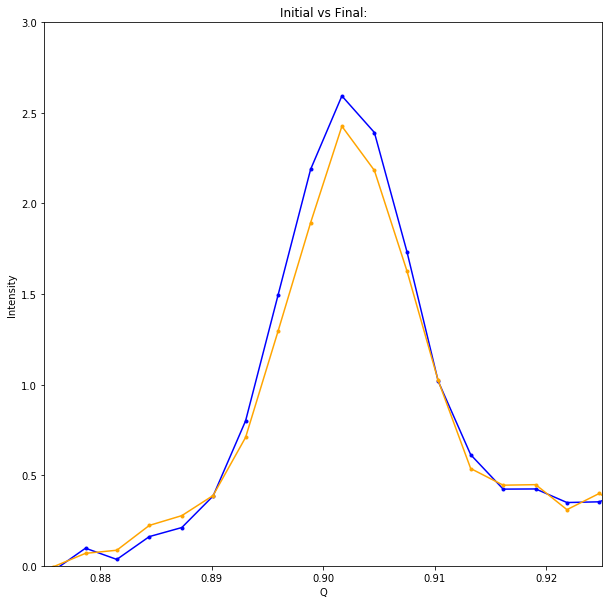

In [240]:
'''Initial vs Final in Q'''

import math
result1=[(((((9.763E-11)/(2*math.sin(math.radians(row/2)))*1e10)**-1)*2)*math.pi) for row in x]
result2 = np.subtract (y,102.5/7)
result3 = np.subtract (z,100.5/7)
#ideally want to subtract (10/7)x + (17/7) from y
plt.plot(result1,result2, marker='.',color='blue')
plt.plot(result1,result3, marker='.',color='orange')
plt.xlim (0.875,0.925)
plt.ylim (0,3)
plt.title('Initial vs Final:')
plt.xlabel('Q')
plt.ylabel('Intensity')
plt.rcParams["figure.figsize"] = (10,10)
plt.show()

In [241]:
>>> A = [6, 7, 8, 9, 10, 11, 12]
>>> subset_of_A = set([6, 9, 12])
>>> [i for i in A if i not in subset_of_A]
[7, 8, 10, 11]

[7, 8, 10, 11]

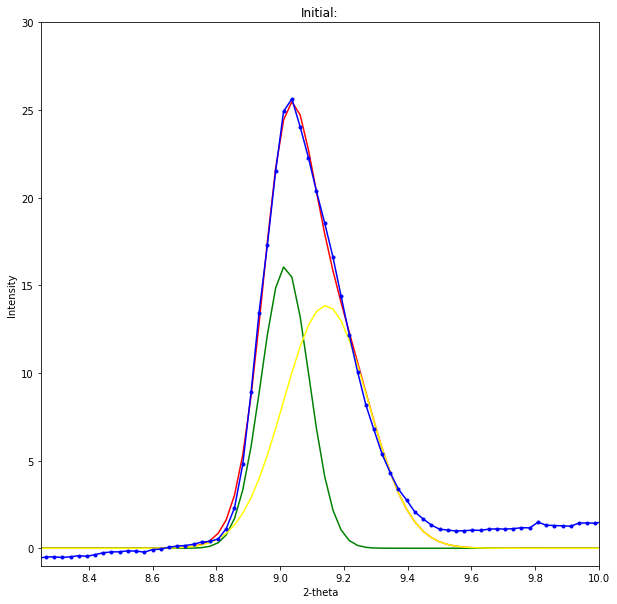

-------------Peak 1-------------
amplitude = 18.62 (+/-) 3.02
center = 9.02 (+/-) 0.08
sigma = 0.15 (+/-) 0.07
area = 117.43
--------------------------------
-------------Peak 2-------------
amplitude = 19.37 (+/-) 4.59
center = 9.14 (+/-) 0.56
sigma = 0.21 (+/-) 0.13
area = 178.68


In [287]:
##Correct 2 Gaussian Fit!!
from matplotlib import gridspec
gs = gridspec.GridSpec(1,1)
ax1 = fig.add_subplot(gs[0])

result = np.subtract (y,109/7)
def _1gaussian(x, amp1,cen1,sigma1):
    return amp1*(1/(sigma1*(np.sqrt(2*np.pi))))*(np.exp((-1.0/2.0)*(((x-cen1)/sigma1)**2)))
popt_gauss, pcov_gauss = scipy.optimize.curve_fit(_1gaussian, x, result, p0=[(40-(107/7)), 9, 0.2])
perr_gauss = np.sqrt(np.diag(pcov_gauss))

def _2gaussian(x, amp1,cen1,sigma1, amp2,cen2,sigma2):
    return amp1*(1/(sigma1*(np.sqrt(2*np.pi))))*(np.exp((-1.0/2.0)*(((x-cen1)/sigma1)**2))) + \
            amp2*(1/(sigma2*(np.sqrt(2*np.pi))))*(np.exp((-1.0/2.0)*(((x-cen2)/sigma2)**2)))

popt_2gauss, pcov_2gauss = scipy.optimize.curve_fit(_2gaussian, x, result, p0=[(41-(107/7)), 9, 0.123, (35-(107/7)),9.2, 0.123])
perr_2gauss = np.sqrt(np.diag(pcov_2gauss))
pars_1 = popt_2gauss[0:3]
pars_2 = popt_2gauss[3:6]
gauss_peak_1 = _1gaussian(x, *pars_1)
gauss_peak_2 = _1gaussian(x, *pars_2)

#print ((x, amp1,cen1,sigma1, amp2,cen2,sigma2))

result = np.subtract (y,109/7)
plt.plot(x, _2gaussian(x, *popt_2gauss),color='red')
#plt.plot(gauss_peak_1,color='green') 
plt.plot(x, gauss_peak_1, "g")
plt.plot(x,gauss_peak_2,color='yellow') 
#ideally want to subtract (10/7)x + (17/7) from y
plt.plot(x,result, marker='.',color='blue')
plt.title('Initial:')
plt.xlabel('2-theta')
plt.ylabel('Intensity')
plt.xlim((8.25, 10))
plt.ylim(-1,30)
plt.rcParams["figure.figsize"] = (10,10)
plt.show()

# this cell prints the fitting parameters with their errors
print ("-------------Peak 1-------------")
print ("amplitude = %0.2f (+/-) %0.2f" % (perr_2gauss[0], pars_1[0]))
print ("center = %0.2f (+/-) %0.2f" % (pars_1[1], perr_2gauss[1]))
print ("sigma = %0.2f (+/-) %0.2f" % (perr_2gauss[2], pars_1[2]))
print ("area = %0.2f" % np.trapz(gauss_peak_1))
print ("--------------------------------")
print ("-------------Peak 2-------------")
print ("amplitude = %0.2f (+/-) %0.2f" % ( perr_2gauss[3],pars_2[0]))
print ("center = %0.2f (+/-) %0.2f" % (pars_2[1], perr_2gauss[4]))
print ("sigma = %0.2f (+/-) %0.2f" % (perr_2gauss[5],pars_2[2]))
print ("area = %0.2f" % np.trapz(gauss_peak_2))


In [267]:
#defining one gaussian --> broken
from scipy import optimize
import matplotlib.pyplot as plt


def gaussian(x, height, center, width, offset):
    return height*np.exp(-(x - center)**2/(2*width**2)) + offset



errfunc1 = lambda p, x, y: (gaussian(x, *p) - y)**2

guess1= [40.8, 9.02, 0.186, 
         0]
optim1, success = optimize.leastsq(errfunc1, guess1[:], args=((x,0), (y,1))
#above is line w problem
plt.plot(x,y)
plt.xlim (8.25, 10)
plt.plot(gaussian((x,y), *optim1), label='One-Gaussian Fit')                            
plt.title("Dark intial")
plt.ylabel("Intensity")
plt.xlabel("2theta")
plt.show ()

SyntaxError: invalid syntax (<ipython-input-267-f0a2721bbd26>, line 17)

In [ ]:
#defining two gaussians --> broken
import scipy, numpy, pylab
from numpy import *
from pylab import *
from scipy import *
from scipy.optimize import leastsq
import matplotlib.pyplot as plt


def gaussian(x, height, center, width, offset):
    return height*np.exp(-(x - center)**2/(2*width**2)) + offset

def two_gaussians(x, h1, c1, w1, 
        h2, c2, w2,
        offset):
    return (gaussian(x, h1, c1, w1, offset=0) +
        gaussian(x, h2, c2, w2, offset=0))

errfunc2 = lambda p, x, y: (two_gaussians(x, *p) - y)**2

guess2= [40.8, 9.02, 0.123, 
         35, 9.2, 0.123, 
         0]
optim2, success = optimize.leastsq(errfunc2, guess2[:], args=(x,y)
#above is line w problem                                                          
plt.plot(x,y)
plt.xlim (8.25, 10)
plt.plot(two_gaussians((x,y), *optim2), label='fit of 2 Gaussians')
plt.title("Dark intial")
plt.ylabel("Intensity")
plt.xlabel("2theta")
print

In [ ]:
#compare calculated lattice spacing for each peak to known value for first peak
#impliment by taking abs value of difference of each lspacecalc and 6.196
#t test for the results of above
## Import the packages
import numpy as np
from scipy import stats

#Sample Size N is number of peaks
N = 
#define a as calculated spacings
a = 

b = 6.196

## Calculate the Standard Deviation
#Calculate the variance to get the standard deviation

#For unbiased max likelihood estimate we have to divide the var by N-1, and therefore the parameter ddof = 1
var_a = a.var(ddof=1)
var_b = 0

#std deviation
s = np.sqrt((var_a + var_b)/2)


## Calculate the t-statistics
t = (a.mean() - b.mean())/(s*np.sqrt(2/N))

## Compare with the critical t-value
#Degrees of freedom
df = 2*N - 2

#p-value after comparison with the t 
p = 1 - stats.t.cdf(t,df=df)

print("t = " + str(t))
print("p = " + str(2*p))
### You can see that after comparing the t statistic with the critical t value (computed internally) we get a good p value of 0.0005 and thus we reject the null hypothesis and thus it proves that the mean of the two distributions are different and statistically significant.

## Cross Checking with the internal scipy function
t2, p2 = stats.ttest_ind(a,b)
print("t = " + str(t2))
print("p = " + str(p2))

In [175]:
#quantify peak intensities for initial
#quantify peak intensities for final
#take abs val of difference

In [176]:
#t test for the results of above
## Import the packages
import numpy as np
from scipy import stats

#Sample Size N is number of peaks
N = 
#define a as calculated spacings
a = 

b = 0

## Calculate the Standard Deviation
#Calculate the variance to get the standard deviation

#For unbiased max likelihood estimate we have to divide the var by N-1, and therefore the parameter ddof = 1
var_a = a.var(ddof=1)
var_b = 0

#std deviation
s = np.sqrt((var_a + var_b)/2)


## Calculate the t-statistics
t = (a.mean() - b.mean())/(s*np.sqrt(2/N))

## Compare with the critical t-value
#Degrees of freedom
df = 2*N - 2

#p-value after comparison with the t 
p = 1 - stats.t.cdf(t,df=df)

print("t = " + str(t))
print("p = " + str(2*p))
### You can see that after comparing the t statistic with the critical t value (computed internally) we get a good p value of 0.0005 and thus we reject the null hypothesis and thus it proves that the mean of the two distributions are different and statistically significant.

## Cross Checking with the internal scipy function
t2, p2 = stats.ttest_ind(a,b)
print("t = " + str(t2))
print("p = " + str(p2))

SyntaxError: invalid syntax (<ipython-input-176-04b400a904aa>, line 7)

In [177]:
#find 1/2 heght of each initial peak
#find width at 1/2 height of each peak
#repeat for final
#take abs value of difference

In [178]:
#t test for the results of above
## Import the packages
import numpy as np
from scipy import stats

#Sample Size N is number of peaks
N = 
#define a as calculated spacings
a = 

b = 0

## Calculate the Standard Deviation
#Calculate the variance to get the standard deviation

#For unbiased max likelihood estimate we have to divide the var by N-1, and therefore the parameter ddof = 1
var_a = a.var(ddof=1)
var_b = 0

#std deviation
s = np.sqrt((var_a + var_b)/2)


## Calculate the t-statistics
t = (a.mean() - b.mean())/(s*np.sqrt(2/N))

## Compare with the critical t-value
#Degrees of freedom
df = 2*N - 2

#p-value after comparison with the t 
p = 1 - stats.t.cdf(t,df=df)

print("t = " + str(t))
print("p = " + str(2*p))
### You can see that after comparing the t statistic with the critical t value (computed internally) we get a good p value of 0.0005 and thus we reject the null hypothesis and thus it proves that the mean of the two distributions are different and statistically significant.

## Cross Checking with the internal scipy function
t2, p2 = stats.ttest_ind(a,b)
print("t = " + str(t2))
print("p = " + str(p2))

SyntaxError: invalid syntax (<ipython-input-178-04b400a904aa>, line 7)

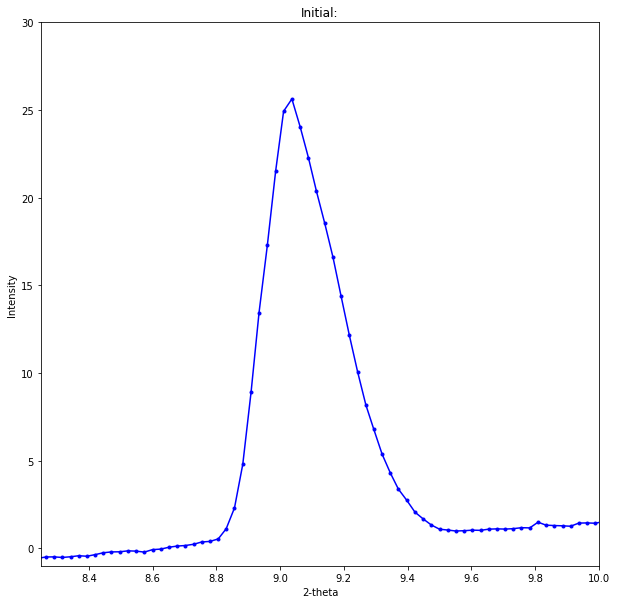

In [179]:
###Initial background subtraction
#down here because won't display at top for some reason??
result = np.subtract (y,109/7)
#ideally want to subtract (10/7)x + (17/7) from y
plt.plot(x,result, marker='.',color='blue')
plt.title('Initial:')
plt.xlabel('2-theta')
plt.ylabel('Intensity')
plt.xlim((8.25, 10))
plt.ylim(-1,30)
plt.rcParams["figure.figsize"] = (10,10)
plt.show()